In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('policing.csv')

/home/rabajaj/.conda/envs/rpb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
df.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'precinct',
       'reporting_area', 'zone', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'type', 'violation', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle', 'search_basis',
       'reason_for_stop', 'vehicle_registration_state', 'notes',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest',
       'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view'],
      dtype='object')

In [38]:
print(df.isnull().sum())
df.dropna(subset=["subject_sex"], inplace=True)
print(df.isnull().sum())
print("-----------------------------------------------------")
print(df.shape)

raw_row_number                          0
date                                    0
time                                 5467
location                                0
lat                                187106
lng                                187106
precinct                           390222
reporting_area                     332393
zone                               390222
subject_age                           839
subject_race                         1850
subject_sex                         12822
officer_id_hash                        11
type                                    0
violation                            8020
arrest_made                            28
citation_issued                       320
warning_issued                        337
outcome                              1935
contraband_found                  2964646
contraband_drugs                  2964646
contraband_weapons                2964646
frisk_performed                        22
search_conducted                  

In [39]:
df.isnull().sum()
print(df.shape)

(3079529, 42)


In [40]:
df.head()

,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,232947,2010-10-10,NaN,"DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...",36.187925,-86.798519,6.0,4403.0,611.0,27.0,...,False,NaN,N,False,False,False,False,False,False,False
1,237161,2010-10-10,10:00:00,"1122 LEBANON PIKE, NASHVILLE, TN, 37210",36.155521,-86.735902,5.0,9035.0,513.0,18.0,...,True,NaN,N,False,False,False,False,False,False,False
2,232902,2010-10-10,10:00:00,"898 DAVIDSON DR, , TN, 37205",36.117420,-86.895593,1.0,5005.0,121.0,52.0,...,False,NaN,N,False,False,False,False,False,False,False
3,233219,2010-10-10,22:00:00,"MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...",36.086799,-86.648581,3.0,8891.0,325.0,25.0,...,False,NaN,N,False,False,False,False,False,False,False
4,232780,2010-10-10,01:00:00,"BUCHANAN ST, NORTH, TN, 37208",36.180038,-86.809109,NaN,NaN,NaN,21.0,...,False,NaN,N,True,True,False,False,False,False,False


In [41]:
df.isnull().sum()

raw_row_number                          0
date                                    0
time                                 5458
location                                0
lat                                185838
lng                                185838
precinct                           387878
reporting_area                     330426
zone                               387878
subject_age                           561
subject_race                         1766
subject_sex                             0
officer_id_hash                         6
type                                    0
violation                            7783
arrest_made                            28
citation_issued                       319
warning_issued                        333
outcome                               343
contraband_found                  2952346
contraband_drugs                  2952346
contraband_weapons                2952346
frisk_performed                        22
search_conducted                  

<AxesSubplot:>

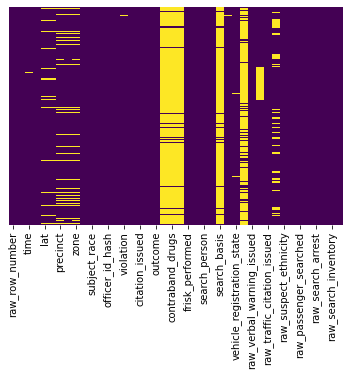

In [42]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [43]:
# Check how much % of missing data is present in each column.
def missing(data):
  print (round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False))
missing(df)

contraband_weapons                95.87
contraband_found                  95.87
search_basis                      95.87
contraband_drugs                  95.87
notes                             83.45
raw_misd_state_citation_issued    22.52
raw_written_warning_issued        15.98
zone                              12.60
precinct                          12.60
reporting_area                    10.73
lng                                6.03
lat                                6.03
vehicle_registration_state         1.01
reason_for_stop                    0.25
violation                          0.25
time                               0.18
subject_race                       0.06
subject_age                        0.02
raw_traffic_citation_issued        0.01
warning_issued                     0.01
outcome                            0.01
citation_issued                    0.01
raw_verbal_warning_issued          0.01
raw_search_inventory               0.00
raw_driver_searched                0.00


In [44]:
def rmissingvaluecol(dff, threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values) 
    print("# Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(l)))
    print("Columns:\n", list(set(list((dff.columns.values))) - set(l)))
    return l

# Here threshold is 80% which means we are going to drop 
# columns having more than 80% of missing data
existing_columns = rmissingvaluecol(df,80) 

# Columns having more than 80 percent missing values:  5
Columns:
 ['notes', 'contraband_found', 'contraband_drugs', 'contraband_weapons', 'search_basis']


In [45]:
policing_df = df[existing_columns]

In [46]:
policing_df.shape

(3079529, 37)

<AxesSubplot:>

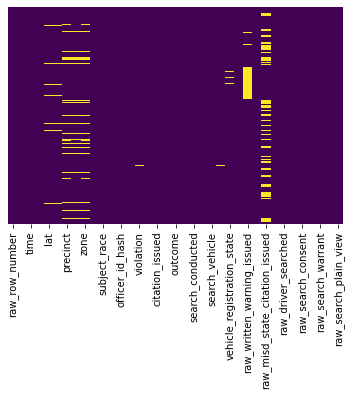

In [47]:
# Check the amount of missing values in the features.
sns.heatmap(policing_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
policing_df['arrest_made'] = policing_df.arrest_made.astype('bool')

<ipython-input-48-5bb836d5cea5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policing_df['arrest_made'] = policing_df.arrest_made.astype('bool')


In [51]:
policing_df.date

0          2010-10-10
1          2010-10-10
2          2010-10-10
3          2010-10-10
4          2010-10-10
              ...    
3092346    2016-09-09
3092347    2016-09-09
3092348    2016-09-09
3092349    2016-09-09
3092350    2016-09-09
Name: date, Length: 3079529, dtype: object

In [54]:
# Concatenate 'date' and 'time' (separated by a space)
combined = policing_df.date.str.cat(policing_df.time, sep=" ")

# Convert 'combined' to datetime format
policing_df['stop_datetime'] = pd.to_datetime(combined)

datetime64[ns]
0                   NaT
1   2010-10-10 10:00:00
2   2010-10-10 10:00:00
3   2010-10-10 22:00:00
4   2010-10-10 01:00:00
Name: stop_datetime, dtype: datetime64[ns]


<ipython-input-54-1377f6cd3c74>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policing_df['stop_datetime'] = pd.to_datetime(combined)


In [56]:
# Set 'stop_datetime' as the index
policing_df.set_index('stop_datetime', inplace=True)

# Examine the index
print(policing_df.index)

# Examine the columns
print(policing_df.columns)

DatetimeIndex([                'NaT', '2010-10-10 10:00:00',
               '2010-10-10 10:00:00', '2010-10-10 22:00:00',
               '2010-10-10 01:00:00', '2010-10-10 01:00:00',
               '2010-10-10 22:02:00', '2010-10-10 10:04:00',
               '2010-10-10 10:05:00', '2010-10-10 10:05:00',
               ...
               '2016-09-09 09:54:00', '2016-09-09 09:54:00',
               '2016-09-09 09:54:00', '2016-09-09 09:54:00',
               '2016-09-09 09:54:00', '2016-09-09 21:54:00',
               '2016-09-09 21:55:00', '2016-09-09 09:56:00',
               '2016-09-09 09:56:00', '2016-09-09 21:57:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=3079529, freq=None)
Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'precinct',
       'reporting_area', 'zone', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'type', 'violation', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'frisk_p

In [2]:
policing_df.to_csv("police.csv")

NameError: name 'policing_df' is not defined

##### Import Formatted Police Data

In [3]:
policing_df = pd.read_csv("police.csv")

/home/rabajaj/.conda/envs/rpb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,9,17,18,20,21,22,23,26,27,28,29,31,32,33,34,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
policing_df.columns

Index(['stop_datetime', 'raw_row_number', 'date', 'time', 'location', 'lat',
       'lng', 'precinct', 'reporting_area', 'zone', 'subject_age',
       'subject_race', 'subject_sex', 'officer_id_hash', 'type', 'violation',
       'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'frisk_performed', 'search_conducted', 'search_person',
       'search_vehicle', 'reason_for_stop', 'vehicle_registration_state',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest',
       'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view'],
      dtype='object')

In [5]:
policing_df.arrest_made.astype('int').value_counts()

0    3029474
1      50055
Name: arrest_made, dtype: int64

##### Violations Overview

In [13]:
outcomes = policing_df.outcome.value_counts(normalize=True).to_frame()

In [14]:
outcomes['Outcome Distribution (%)'] = outcomes['outcome']
outcomes['Outcomes'] = outcomes.index

In [15]:
outcomes

,outcome,Outcome Distribution (%),Outcomes
warning,0.763092,0.763092,warning
citation,0.220662,0.220662,citation
arrest,0.016247,0.016247,arrest


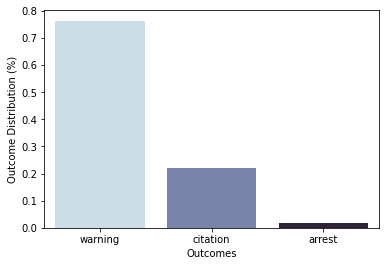

In [16]:
sns.barplot(x="Outcomes", y="Outcome Distribution (%)", data=outcomes, palette="ch:s=.25,rot=-.25")
#plt.savefig('outcome.pdf', dpi = 2000)

In [17]:
policing_df.shape

(3079529, 38)

##### Police Actions across Races

In [18]:
policing_df.subject_race.value_counts()

white                     1665088
black                     1161890
hispanic                   164258
asian/pacific islander      41518
unknown                     34624
other                       10385
Name: subject_race, dtype: int64

In [19]:
white = policing_df[policing_df['subject_race'] == "white"]
black = policing_df[policing_df['subject_race'] == "black"]
hispanic = policing_df[policing_df['subject_race'] == "hispanic"]
asian = policing_df[policing_df['subject_race'] == "asian/pacific islander"]

In [20]:
white.shape

(1665088, 38)

In [21]:
white_outcome = white.outcome.value_counts(normalize=True).to_frame()
white_outcome["race"] = "white"
black_outcome = black.outcome.value_counts(normalize=True).to_frame()
black_outcome["race"] = "black"
hispanic_outcome = hispanic.outcome.value_counts(normalize=True).to_frame()
hispanic_outcome["race"] = "hispanic"
asian_outcome = asian.outcome.value_counts(normalize=True).to_frame()
asian_outcome["race"] = "asian"

In [22]:
frames = [white_outcome, black_outcome, hispanic_outcome, asian_outcome]
race_result = pd.concat(frames)

In [23]:
race_result['action'] = race_result.index

In [24]:
race_result.outcome = race_result.outcome.astype('float')
print(race_result.dtypes)
print(race_result)

outcome    float64
race        object
action      object
dtype: object
           outcome      race    action
warning   0.768988     white   warning
citation  0.220151     white  citation
arrest    0.010861     white    arrest
warning   0.775102     black   warning
citation  0.202323     black  citation
arrest    0.022575     black    arrest
warning   0.625963  hispanic   warning
citation  0.342914  hispanic  citation
arrest    0.031123  hispanic    arrest
warning   0.801021     asian   warning
citation  0.191825     asian  citation
arrest    0.007154     asian    arrest


In [25]:
race_result["Race"] = race_result["race"]
race_result["Percentage (%)"] = race_result["outcome"]
race_result["Police Action"] = race_result["action"]

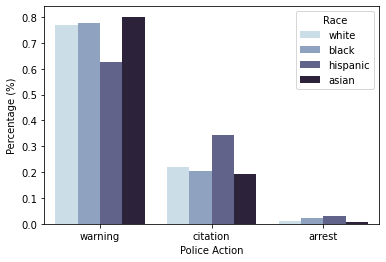

In [26]:
sns.barplot(x="Police Action", y="Percentage (%)", hue="Race", data=race_result, palette="ch:s=.25,rot=-.25")
#plt.savefig('race.pdf', dpi = 2000)

In [27]:
violations = policing_df.violation.value_counts(normalize=True).to_frame()

In [28]:
violations["Violation Type"] = violations.index
violations["Percentage (%)"] = violations["violation"]

In [29]:
violations

,violation,Violation Type,Percentage (%)
moving traffic violation,0.501639,moving traffic violation,0.501639
vehicle equipment violation,0.323211,vehicle equipment violation,0.323211
safety violation,0.060293,safety violation,0.060293
registration,0.060207,registration,0.060207
seatbelt violation,0.033482,seatbelt violation,0.033482
investigative stop,0.018282,investigative stop,0.018282
parking violation,0.002523,parking violation,0.002523
child restraint,0.000363,child restraint,0.000363


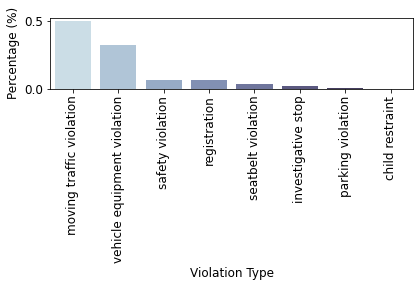

In [30]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
sns.barplot(x="Violation Type", y="Percentage (%)", data=violations, palette="ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig('violations.pdf', dpi = 2000)

##### Analysis based on Gender

In [31]:
male = policing_df[policing_df.subject_sex == "male"]
female = policing_df[policing_df.subject_sex == "female"]

In [32]:
male_violations = male.violation.value_counts(normalize=True).to_frame()
female_violations = female.violation.value_counts(normalize=True).to_frame()

In [33]:
male_violations["Violation Type"] = male_violations.index
female_violations["Violation Type"] = female_violations.index

In [34]:
female_violations["Percentage (%)"] = female_violations["violation"]
female_violations["Gender"] = "Female"
male_violations["Percentage (%)"] = male_violations["violation"]
male_violations["Gender"] = "Male"

In [35]:
gender_frames = [female_violations, male_violations]
gender_result = pd.concat(gender_frames)

In [36]:
gender_result

,violation,Violation Type,Percentage (%),Gender
moving traffic violation,0.506626,moving traffic violation,0.506626,Female
vehicle equipment violation,0.326046,vehicle equipment violation,0.326046,Female
registration,0.061622,registration,0.061622,Female
safety violation,0.060160,safety violation,0.060160,Female
seatbelt violation,0.027144,seatbelt violation,0.027144,Female
investigative stop,0.015427,investigative stop,0.015427,Female
parking violation,0.002395,parking violation,0.002395,Female
child restraint,0.000580,child restraint,0.000580,Female
moving traffic violation,0.498219,moving traffic violation,0.498219,Male
vehicle equipment violation,0.321266,vehicle equipment violation,0.321266,Male


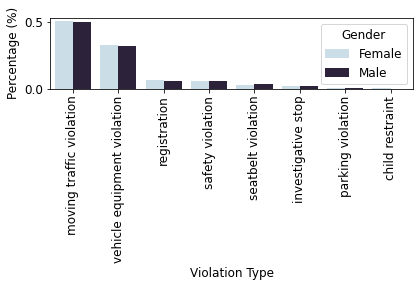

In [37]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
sns.barplot(x="Violation Type", y="Percentage (%)", hue="Gender", data=gender_result, palette="ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig('gender_violations.pdf', dpi = 2000)

### Does gender affect who would get frisked?

0.4837512482406687


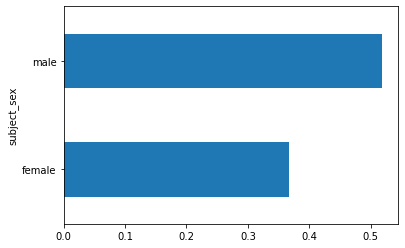

In [11]:
# Create a DataFrame of stops in which a search was conducted
searched = policing_df[policing_df.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk_performed.mean())

# Calculate the frisk rate for each gender
searched.groupby('subject_sex').frisk_performed.mean().plot(kind='barh')

In [17]:
policing_df.columns

Index(['stop_datetime', 'raw_row_number', 'date', 'time', 'location', 'lat',
       'lng', 'precinct', 'reporting_area', 'zone', 'subject_age',
       'subject_race', 'subject_sex', 'officer_id_hash', 'type', 'violation',
       'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'frisk_performed', 'search_conducted', 'search_person',
       'search_vehicle', 'reason_for_stop', 'vehicle_registration_state',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest',
       'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view'],
      dtype='object')

### Does Gender affect who gets a speeding ticket?

In [58]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = policing_df[(policing_df.subject_sex == 'female') & (policing_df.violation == 'moving traffic violation')] 

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = policing_df[(policing_df.subject_sex == 'male') & (policing_df.violation == 'moving traffic violation')] 

# Compute the stop outcomes for female drivers (as proportions)
Female_Speeding = female_and_speeding.outcome.value_counts(normalize=True).to_frame()

# Compute t`he stop outcomes for male drivers (as proportions)
Male_Speeding = male_and_speeding.outcome.value_counts(normalize=True).to_frame()

In [74]:
Female_Speeding["Speeding Outcome"] = Female_Speeding.index
Male_Speeding["Speeding Outcome"] = Male_Speeding.index

In [75]:
Female_Speeding["Percentage (%)"] = Female_Speeding["outcome"]
Male_Speeding["Percentage (%)"] = Male_Speeding["outcome"]

In [76]:
Female_Speeding['Gender'] = 'Female'
Male_Speeding['Gender'] = 'Male'

In [77]:
gender_frames = [Female_Speeding, Male_Speeding]
gender_result = pd.concat(gender_frames)

In [78]:
gender_result

,outcome,Percentage (%),Gender,Outcome,Speeding Outcome
warning,0.685880,0.685880,Female,warning,warning
citation,0.304782,0.304782,Female,citation,citation
arrest,0.009339,0.009339,Female,arrest,arrest
warning,0.671205,0.671205,Male,warning,warning
citation,0.310279,0.310279,Male,citation,citation
arrest,0.018516,0.018516,Male,arrest,arrest


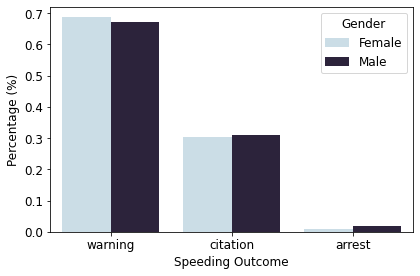

In [80]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
sns.barplot(x="Speeding Outcome", y="Percentage (%)", hue="Gender", data=gender_result, palette="ch:s=.25,rot=-.25")
# plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('speeding_outcome_gender.pdf', dpi = 2000)

### Does gender affect whose vehicle is searched?

In [82]:
policing_df.columns

Index(['stop_datetime', 'raw_row_number', 'date', 'time', 'location', 'lat',
       'lng', 'precinct', 'reporting_area', 'zone', 'subject_age',
       'subject_race', 'subject_sex', 'officer_id_hash', 'type', 'violation',
       'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'frisk_performed', 'search_conducted', 'search_person',
       'search_vehicle', 'reason_for_stop', 'vehicle_registration_state',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest',
       'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view'],
      dtype='object')

In [76]:
policing_df.groupby(['violation', 'subject_sex']).search_conducted.mean()

violation                    subject_sex
child restraint              female         0.030345
                             male           0.071795
investigative stop           female         0.094319
                             male           0.184111
moving traffic violation     female         0.019689
                             male           0.046677
parking violation            female         0.024733
                             male           0.047719
registration                 female         0.025768
                             male           0.055277
safety violation             female         0.023334
                             male           0.048620
seatbelt violation           female         0.031903
                             male           0.060277
vehicle equipment violation  female         0.024817
                             male           0.055152
Name: search_conducted, dtype: float64

### Effect of time on arrests

In [30]:
policing_df.columns


Index(['stop_datetime', 'raw_row_number', 'date', 'time', 'location', 'lat',
       'lng', 'precinct', 'reporting_area', 'zone', 'subject_age',
       'subject_race', 'subject_sex', 'officer_id_hash', 'type', 'violation',
       'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'frisk_performed', 'search_conducted', 'search_person',
       'search_vehicle', 'reason_for_stop', 'vehicle_registration_state',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest',
       'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view'],
      dtype='object')

In [31]:
policing_df['stop_datetime'] = pd.to_datetime(policing_df['stop_datetime'])

In [34]:
policing_df.set_index('stop_datetime', inplace=True)

In [35]:
# Calculate the overall arrest rate
print(policing_df.arrest_made.mean())

# Calculate the hourly arrest rate
print(policing_df.groupby(policing_df.index.hour).arrest_made.mean())

# Save the hourly arrest rate
hourly_arrest_rate = policing_df.groupby(policing_df.index.hour).arrest_made.mean()

0.016254108988744707
stop_datetime
0.0     0.024296
1.0     0.036689
2.0     0.044858
3.0     0.044957
4.0     0.036431
5.0     0.019485
6.0     0.022529
7.0     0.006948
8.0     0.006715
9.0     0.008084
10.0    0.008824
11.0    0.010824
12.0    0.009865
13.0    0.011064
14.0    0.014807
15.0    0.009831
16.0    0.011320
17.0    0.013759
18.0    0.014532
19.0    0.013743
20.0    0.015317
21.0    0.017862
22.0    0.022141
23.0    0.018623
Name: arrest_made, dtype: float64


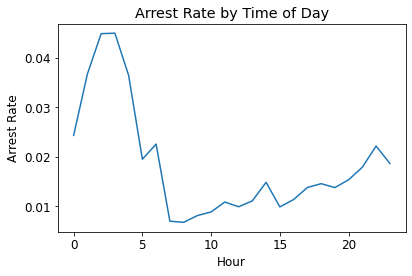

In [38]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.tight_layout()
plt.savefig('timeofarrest.pdf', dpi = 2000)
plt.show()

### Effect of drugs and search on policing

In [48]:
df.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'precinct',
       'reporting_area', 'zone', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'type', 'violation', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle', 'search_basis',
       'reason_for_stop', 'vehicle_registration_state', 'notes',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest',
       'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view'],
      dtype='object')

In [60]:
df.search_basis.value_counts()

consent           67629
other             25620
plain view        18443
probable cause    16013
Name: search_basis, dtype: int64

In [51]:
# Concatenate 'date' and 'time' (separated by a space)
combined = df.date.str.cat(df.time, sep=" ")

# Convert 'combined' to datetime format
df['stop_datetime'] = pd.to_datetime(combined)
df.set_index('stop_datetime', inplace=True)

In [58]:
df.contraband_drugs.shape

(3092351,)

In [69]:
annual_drug_rate = df.groupby(df.index.year).contraband_drugs.mean()

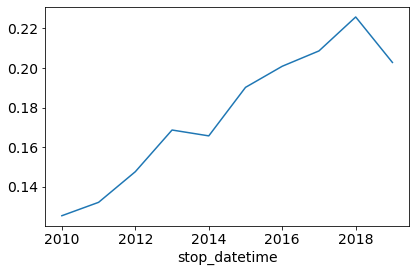

In [101]:
df.groupby(df.index.year).contraband_drugs.mean().plot()
plt.tight_layout()
plt.savefig('Drug related stops.pdf', dpi = 2000)
plt.show()

In [71]:
annual_search_rate = df.groupby(df.index.year).search_conducted.mean()

In [72]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

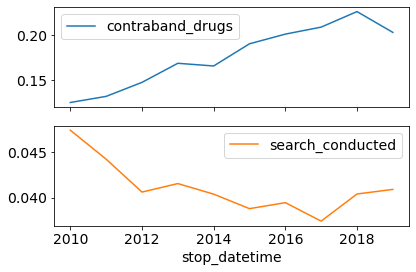

In [74]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

# Create a line plot of 'hourly_arrest_rate'
annual.plot(subplots=True)

# # Add the xlabel, ylabel, and title
# plt.xlabel('Year')
# plt.ylabel('Drugs Found')
# plt.title('Annual Drug Rate')

# Display the plot
plt.tight_layout()
plt.savefig('Comparing drug and search rates.pdf', dpi = 2000)
plt.show()

In [81]:
df.notes

stop_datetime
NaT                                               NaN
2010-10-10 10:00:00                               NaN
2010-10-10 10:00:00                               NaN
2010-10-10 22:00:00                               NaN
2010-10-10 01:00:00                               NaN
                                    ...              
2016-09-09 21:54:00                               NaN
2016-09-09 21:55:00                               NaN
2016-09-09 09:56:00                     RAN STOP SIGN
2016-09-09 09:56:00                               NaN
2016-09-09 21:57:00    CITED FOR NOT HAVING INSURANCE
Name: notes, Length: 3092351, dtype: object

##### Search Conducted

In [58]:
policing_df.search_conducted.mean()

0.04130000704661907

In [61]:
# we found that male driver are searched more than twice as ofter as 
# female drivers.
policing_df.groupby('subject_sex').search_conducted.mean()

subject_sex
female    0.023516
male      0.053492
Name: search_conducted, dtype: float64

In [62]:
# After adding violations to the groupby() operation
policing_df.groupby(['violation', 'subject_sex']).search_conducted.mean()

violation                    subject_sex
child restraint              female         0.030345
                             male           0.071795
investigative stop           female         0.094319
                             male           0.184111
moving traffic violation     female         0.019689
                             male           0.046677
parking violation            female         0.024733
                             male           0.047719
registration                 female         0.025768
                             male           0.055277
safety violation             female         0.023334
                             male           0.048620
seatbelt violation           female         0.031903
                             male           0.060277
vehicle equipment violation  female         0.024817
                             male           0.055152
Name: search_conducted, dtype: float64

In [63]:
search_rate = policing_df.groupby(['violation', 'subject_sex']).search_conducted.mean()
search_rate

violation                    subject_sex
child restraint              female         0.030345
                             male           0.071795
investigative stop           female         0.094319
                             male           0.184111
moving traffic violation     female         0.019689
                             male           0.046677
parking violation            female         0.024733
                             male           0.047719
registration                 female         0.025768
                             male           0.055277
safety violation             female         0.023334
                             male           0.048620
seatbelt violation           female         0.031903
                             male           0.060277
vehicle equipment violation  female         0.024817
                             male           0.055152
Name: search_conducted, dtype: float64

In [65]:
policing_df.pivot_table(index='violation', columns='subject_sex', values='search_conducted')

subject_sex,female,male
violation,,
child restraint,0.030345,0.071795
investigative stop,0.094319,0.184111
moving traffic violation,0.019689,0.046677
parking violation,0.024733,0.047719
registration,0.025768,0.055277
safety violation,0.023334,0.048620
seatbelt violation,0.031903,0.060277
vehicle equipment violation,0.024817,0.055152


Our hypothesis was that search rate varies by violation type, and the difference in search rate between males and females is perhaps because they tend to commit different violations. The resukts disapprove the hypothesis since seach rate is higher for males across all violations.

##### Analysis based on Weather Data

In [82]:
policing_df = pd.read_csv("police.csv")

/home/rabajaj/.conda/envs/rpb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,9,17,18,20,21,22,23,26,27,28,29,31,32,33,34,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [83]:
policing_df.shape

(3079529, 38)

In [84]:
weather_df = pd.read_csv('weather.csv')

In [85]:
weather_df.shape

(8112, 40)

In [86]:
weather_df.columns

Index(['STATION', 'NAME', 'DATE', 'AWND', 'FMTM', 'PGTM', 'PRCP', 'PSUN',
       'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TSUN', 'WDF2', 'WDF5', 'WESD',
       'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07',
       'WT08', 'WT09', 'WT10', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17',
       'WT18', 'WT19', 'WT21', 'WT22', 'WV03'],
      dtype='object')

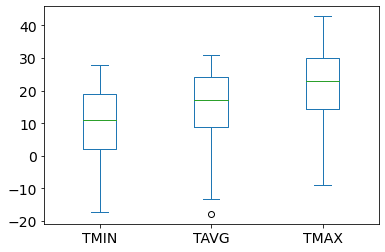

In [90]:
# check if the data is trust-worthy by checking: 
# max > avg && avg > min
weather_df[["TMIN", "TAVG", "TMAX"]].plot(kind='box')

# plt.tight_layout()
plt.savefig('temp.pdf', dpi = 2000)
# plt.show()

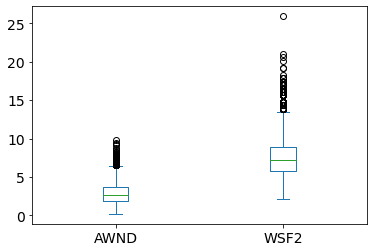

In [94]:
weather_df[['AWND', 'WSF2']].plot(kind='box')
plt.savefig('wind.pdf', dpi = 2000)

count    8111.000000
mean       11.489323
std         4.107508
min         1.100000
25%         8.800000
50%        11.600000
75%        13.900000
max        27.700000
Name: TDIFF, dtype: float64


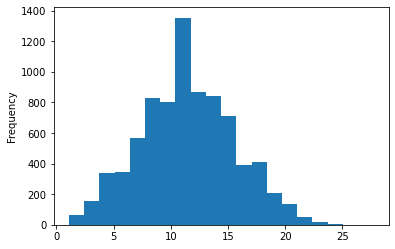

In [8]:
# assess whether the dataset seems trustworthy by plotting 
# the difference between the maximum and minimum temperatures.

# Create a 'TDIFF' column that represents temperature difference
weather_df['TDIFF'] = weather_df['TMAX'] - weather_df["TMIN"]

# Describe the 'TDIFF' column
print(weather_df['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather_df['TDIFF'].plot(kind='hist', bins=20)

# Display the plot
plt.show()

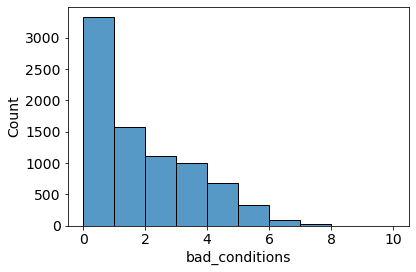

In [96]:
# Counting bad weather conditions
# The weather DataFrame contains 20 columns that start with 'WT',
# each of which represents a bad weather condition. For example:

#    WT05 indicates "Hail"
#    WT11 indicates "High or damaging winds"
#    WT17 indicates "Freezing rain"

# For every row in the dataset, each WT column contains either a 1
# (meaning the condition was present that day) or NaN (meaning the condition was not present).

# In this exercise, you'll quantify "how bad" the weather was each
# day by counting the number of 1 values in each row.

# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather_df.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather_df['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather_df['bad_conditions'] = weather_df.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
#weather_df['bad_conditions'].plot(kind='hist')

sns.histplot(x="bad_conditions", data=weather_df, binwidth=1, palette="ch:s=.25,rot=-.25")
plt.tight_layout()
plt.savefig('weather-conditions.pdf', dpi = 2000)


# Display the plot
plt.show()

In [13]:
# The counts range from 0 to 9, and should be converted to ratings as follows:

#     Convert 0 to 'good'
#     Convert 1 through 4 to 'bad'
#     Convert 5 through 9 to 'worse'

# Count the unique values in 'bad_conditions' and sort the index
print(weather_df.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather_df['rating'] = weather_df.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather_df.rating.value_counts())

0     3321
1     1575
2     1108
3      996
4      679
5      324
6       85
7       21
8        2
10       1
Name: bad_conditions, dtype: int64
bad      4358
good     3321
worse     432
Name: rating, dtype: int64


In [19]:
ratings = weather_df.rating.value_counts().to_frame()

In [20]:
ratings['Frequency'] = ratings['rating']
ratings['Rating'] = ratings.index

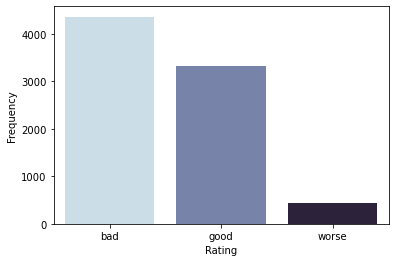

In [35]:
sns.barplot(x="Rating", y="Frequency", data=ratings, palette="ch:s=.25,rot=-.25")
#plt.savefig('rating.pdf', dpi = 2000)

In [43]:
# Since the rating column only has a few possible values, 
# you'll change its data type to category in order to store the data more efficiently.
# You'll also specify a logical order for the categories, which will be useful for future exercises.

# Create a list of weather ratings in logical order
#cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather_df['rating'] = weather_df.rating.astype("category")

# Examine the head of 'rating'
print(weather_df.rating.head())

0      bad
1      bad
2      bad
3    worse
4     good
Name: rating, dtype: category
Categories (3, object): ['bad', 'good', 'worse']


In [50]:
policing_df.head()

,stop_datetime,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,NaN,232947,2010-10-10,NaN,"DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...",36.187925,-86.798519,6.0,4403.0,611.0,...,False,NaN,N,False,False,False,False,False,False,False
1,2010-10-10 10:00:00,237161,2010-10-10,10:00:00,"1122 LEBANON PIKE, NASHVILLE, TN, 37210",36.155521,-86.735902,5.0,9035.0,513.0,...,True,NaN,N,False,False,False,False,False,False,False
2,2010-10-10 10:00:00,232902,2010-10-10,10:00:00,"898 DAVIDSON DR, , TN, 37205",36.117420,-86.895593,1.0,5005.0,121.0,...,False,NaN,N,False,False,False,False,False,False,False
3,2010-10-10 22:00:00,233219,2010-10-10,22:00:00,"MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...",36.086799,-86.648581,3.0,8891.0,325.0,...,False,NaN,N,False,False,False,False,False,False,False
4,2010-10-10 01:00:00,232780,2010-10-10,01:00:00,"BUCHANAN ST, NORTH, TN, 37208",36.180038,-86.809109,NaN,NaN,NaN,...,False,NaN,N,True,True,False,False,False,False,False


In [51]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather_df[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

         DATE rating
0  2000-01-01    bad
1  2000-01-02    bad
2  2000-01-03    bad
3  2000-01-04  worse
4  2000-01-05   good


In [56]:
# Examine the shape of 'ri'
print(policing_df.shape)

# Merge 'ri' and 'weather_rating' using a left join
policing_weather_df = pd.merge(left=policing_df, right=weather_rating, left_on='date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(policing_weather_df)

# Set 'stop_datetime' as the index of 'ri_weather'
policing_weather_df.set_index('stop_datetime', inplace=True)

(3079529, 38)
               stop_datetime raw_row_number        date      time  \
0                        NaN         232947  2010-10-10       NaN   
1        2010-10-10 10:00:00         237161  2010-10-10  10:00:00   
2        2010-10-10 10:00:00         232902  2010-10-10  10:00:00   
3        2010-10-10 22:00:00         233219  2010-10-10  22:00:00   
4        2010-10-10 01:00:00         232780  2010-10-10  01:00:00   
...                      ...            ...         ...       ...   
3079524  2016-09-09 21:54:00        2555063  2016-09-09  21:54:00   
3079525  2016-09-09 21:55:00        2555857  2016-09-09  21:55:00   
3079526  2016-09-09 09:56:00        2554596  2016-09-09  09:56:00   
3079527  2016-09-09 09:56:00        2560219  2016-09-09  09:56:00   
3079528  2016-09-09 21:57:00        2555099  2016-09-09  21:57:00   

                                                  location        lat  \
0        DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...  36.187925   
1          

In [57]:
policing_weather_df.to_csv('policing_weather_df.csv', index=True)

In [70]:
policing_weather_df.groupby('rating').arrest_made.mean()

rating
bad      0.016298
good     0.016044
worse    0.019800
Name: arrest_made, dtype: float64

In [71]:
policing_weather_df.groupby(['violation', 'rating']).arrest_made.mean()

violation                    rating
child restraint              bad       0.036522
                             good      0.025097
                             worse     0.181818
investigative stop           bad       0.079678
                             good      0.085474
                             worse     0.079046
moving traffic violation     bad       0.014834
                             good      0.014513
                             worse     0.018629
parking violation            bad       0.011006
                             good      0.010638
                             worse     0.024390
registration                 bad       0.017268
                             good      0.017018
                             worse     0.015903
safety violation             bad       0.014873
                             good      0.014501
                             worse     0.017791
seatbelt violation           bad       0.017129
                             good      0.016980
    

In [67]:
policing_weather_df.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'precinct',
       'reporting_area', 'zone', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'type', 'violation', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle',
       'reason_for_stop', 'vehicle_registration_state',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest',
       'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view',
       'DATE', 'rating'],
      dtype='object')

## Logistic Regression

In [2]:
df = pd.read_csv('policing_weather_df.csv')

/home/rabajaj/.conda/envs/rpb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,9,17,18,20,21,22,23,26,27,28,29,31,32,33,34,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.columns

Index(['stop_datetime', 'raw_row_number', 'date', 'time', 'location', 'lat',
       'lng', 'precinct', 'reporting_area', 'zone', 'subject_age',
       'subject_race', 'subject_sex', 'officer_id_hash', 'type', 'violation',
       'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'frisk_performed', 'search_conducted', 'search_person',
       'search_vehicle', 'reason_for_stop', 'vehicle_registration_state',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest',
       'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view',
       'DATE', 'rating'],
      dtype='object')

In [116]:
def changeArrestsMade(row):
    if row == True:
        row_answer = 1
    else:
        row_answer = 0
    return row_answer


df['arrest_made'] = df['arrest_made'].apply(lambda row: changeArrestsMade(row))

In [133]:
df1 = df[[ 'subject_age', 'subject_race', 'subject_sex', 'type', 'arrest_made', 'citation_issued', 'warning_issued',
          'outcome', 'search_conducted', 'reason_for_stop', 'violation', 'frisk_performed' ]]
df1 = df1.dropna()

In [156]:
df2 = df1.sample(frac = 1.0).groupby('arrest_made').head(45000)

In [157]:
df2.arrest_made.value_counts()

0    45000
1    45000
Name: arrest_made, dtype: int64

In [158]:
ade = df2[[ 'subject_race', 'subject_sex',
             'reason_for_stop', 'violation', 'frisk_performed']]

In [159]:
adex = pd.get_dummies(ade)

In [136]:
ade.value_counts()

subject_race            subject_sex  reason_for_stop              violation                    frisk_performed
white                   male         moving traffic violation     moving traffic violation     False              519649
                        female       moving traffic violation     moving traffic violation     False              351180
                        male         vehicle equipment violation  vehicle equipment violation  False              301088
black                   male         moving traffic violation     moving traffic violation     False              279482
                        female       moving traffic violation     moving traffic violation     False              238990
                                                                                                                   ...  
hispanic                male         child restraint              child restraint              True                    1
asian/pacific islander  female       parki

In [160]:
adex['subject_age'] = df1['subject_age'].astype('int')
adex['citation_issued'] = df1.citation_issued.astype('int')
adex['warning_issued'] = df1.warning_issued.astype('int')

In [161]:
yval = df2['arrest_made']

In [162]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(adex, yval, test_size=0.30, random_state=101, stratify=yval)

In [163]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
test_predictions = lgr.predict(X_test)
train_predictions = lgr.predict(X_train)

/home/rabajaj/.conda/envs/rpb/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [164]:
from sklearn.metrics import classification_report
print("Train Classification")
print(classification_report(y_train, train_predictions ))
print("-----------------------------------------------")
print("Test Classification")
print(classification_report(y_test, test_predictions ))

Train Classification
              precision    recall  f1-score   support

           0       0.78      0.91      0.84     31500
           1       0.89      0.75      0.81     31500

    accuracy                           0.83     63000
   macro avg       0.84      0.83      0.83     63000
weighted avg       0.84      0.83      0.83     63000

-----------------------------------------------
Test Classification
              precision    recall  f1-score   support

           0       0.78      0.91      0.84     13500
           1       0.89      0.75      0.81     13500

    accuracy                           0.83     27000
   macro avg       0.84      0.83      0.83     27000
weighted avg       0.84      0.83      0.83     27000



In [165]:
lgr.score(X_test, y_test)

0.8275185185185185

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [167]:
test_predictions = clf.predict(X_test)
train_predictions = clf.predict(X_train)

In [168]:
from sklearn.metrics import classification_report
print("Train Classification")
print(classification_report(y_train, train_predictions ))
print("-----------------------------------------------")
print("Test Classification")
print(classification_report(y_test, test_predictions ))

Train Classification
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     31500
           1       0.92      0.78      0.85     31500

    accuracy                           0.86     63000
   macro avg       0.87      0.86      0.86     63000
weighted avg       0.87      0.86      0.86     63000

-----------------------------------------------
Test Classification
              precision    recall  f1-score   support

           0       0.79      0.91      0.84     13500
           1       0.89      0.75      0.82     13500

    accuracy                           0.83     27000
   macro avg       0.84      0.83      0.83     27000
weighted avg       0.84      0.83      0.83     27000



In [149]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, train_predictions))
print("---------------------------------------")
print(accuracy_score(y_test, test_predictions))



0.991159237068179
---------------------------------------
0.9904639847076201


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

test_class_probabilities = clf.predict_proba(X_test)
train_class_probabilities = 
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()